<a href="https://colab.research.google.com/github/Akshay9715/Machine-Learning-Models/blob/main/RandomForest/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting google drive**

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing DATASET form Kaggle**

In [91]:
!kaggle datasets download -d altruistdelhite04/gold-price-data

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
License(s): unknown
gold-price-data.zip: Skipping, found more recently modified local copy (use --force to force download)


**UNZIPING THE FILE**

In [92]:
import zipfile
zip_ref = zipfile.ZipFile('gold-price-data.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [93]:
#Knowing Current Path
import os
print(os.getcwd())

/content


# Importing Necessary Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection AND Processing

In [95]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Colab Notebooks/Project_1/gld_price_data.csv')
print("First Five Rows of the DATA.\n")
print(df.head())
print("\n Last Five Rows on the DATA. \n")
print(df.tail())

First Five Rows of the DATA.

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

 Last Five Rows on the DATA. 

           Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033


## Gathering DATA Information

In [96]:
df.shape

(2290, 6)

In [97]:
df.info()
print("\n Checking null values.\n")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB

 Checking null values.



,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [98]:
# Gathering Statical INFO from the DATA.....
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Checking correlation between columns

In [99]:
correlation = df.drop(columns=['Date']).corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


Plotting Heatmap to Understand Data Visually

<Axes: >

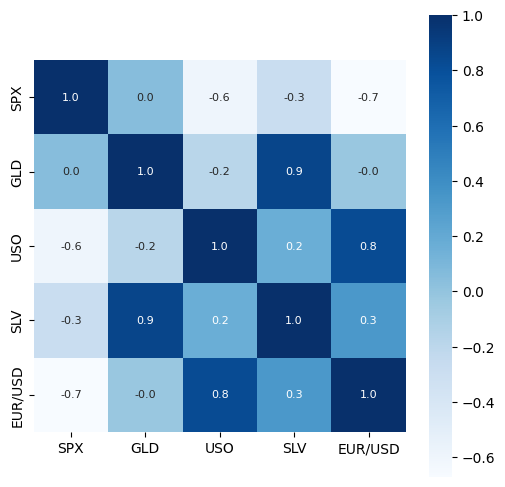

In [100]:
plt.figure(figsize = (6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot = True,annot_kws={'size':8},cmap='Blues')

<ipython-input-101-a0b331cd644f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

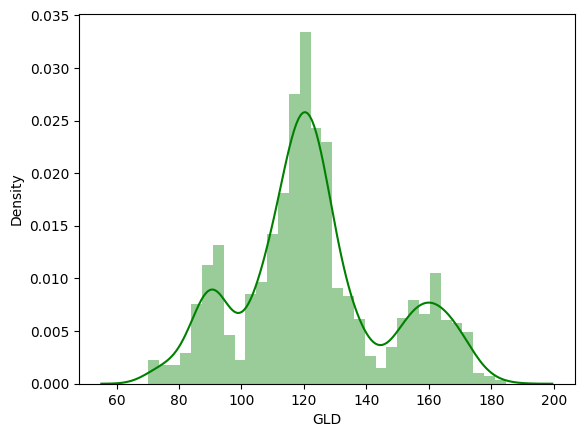

In [101]:
# Distribution of Gold Price
sns.distplot(df['GLD'],color='green')

Seperating columns

In [102]:
X = df.drop(columns=['Date','GLD'])
Y = df['GLD']

In [103]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [104]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


Seperating Training and Testing Data

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=2,test_size=0.3)

In [106]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1603, 4), (687, 4), (1603,), (687,))

Training Model :- Random Forest Regressor

In [107]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

Model predictions

In [108]:
y_pred = model.predict(x_test)
y_pred

array([168.48639987,  81.50340006, 116.34089992, 127.3094005 ,
       120.46640168, 154.59399803, 150.99770043, 126.1603996 ,
       117.93609873, 125.93250103, 116.06240089, 171.9970012 ,
       142.61719881, 167.55289825, 115.27550011, 117.43980042,
       138.24920274, 170.1241009 , 159.7543036 , 161.35680003,
       155.16129978, 125.50810026, 175.48029961, 157.12390305,
       125.11070084,  93.93339931,  76.75999987, 120.36699998,
       119.28230032, 167.28660052,  88.60359914, 125.21270171,
        91.1658009 , 117.78499973, 121.14439925, 136.42040136,
       115.50620107, 116.32510062, 149.17239914, 107.23860101,
       104.25600179,  87.35079809, 126.56800013, 118.05369901,
       152.44239884, 119.90580013, 108.33840072, 108.27359795,
        93.31590018, 127.20039736,  75.0656002 , 113.63269973,
       121.10179968, 111.03589887, 118.97029898, 120.57059978,
       158.77779996, 167.76070175, 147.19709684,  86.80320014,
        94.31109992,  86.81599854,  90.8239003 , 119.05

MODEL Evaluation

In [109]:
from sklearn.metrics import r2_score , mean_absolute_error

print("R2 score for this Model is :- ", r2_score(y_test,y_pred))
print("MAE of the Model is :- ", mean_absolute_error(y_test,y_pred))

R2 score for this Model is :-  0.9894915559178309
MAE of the Model is :-  1.3346036809170285


Ploting Predicted Values[link text](https://)

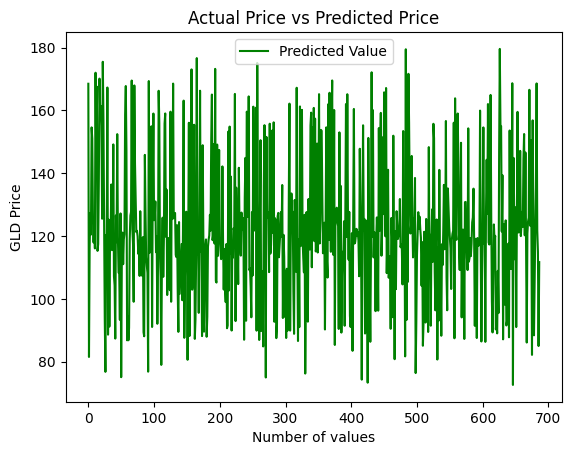

In [110]:
plt.plot(y_pred,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()